In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data from SG

In [64]:
df = pd.read_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/Irece/sg_irece.csv',low_memory=False)

In [ ]:
df.head()

In [65]:
df['ones'] = 1

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32855 entries, 0 to 32854
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        32855 non-null  object 
 1   estadoNotificacao         32855 non-null  object 
 2   estadoNotificacaoIBGE     1805 non-null   object 
 3   municipioNotificacao      32847 non-null  object 
 4   municipioNotificacaoIBGE  1805 non-null   float64
 5   profissionalSaude         32848 non-null  object 
 6   profissionalSeguranca     32663 non-null  object 
 7   cbo                       2763 non-null   object 
 8   sexo                      32855 non-null  int64  
 9   racaCor                   32517 non-null  object 
 10  estado                    32849 non-null  object 
 11  estadoIBGE                14317 non-null  object 
 12  municipio                 32855 non-null  object 
 13  municipioIBGE             32855 non-null  int64  
 14  dataNo

In [ ]:
df.filter(['estado','estadoIBGE', 'municipio', 'municipioIBGE']).head()

In [ ]:
df.filter(['dataInicioSintomas','dataNotificacao', 'dataTeste']).head()

## Contagens de casos 

In [ ]:
df.filter(['estadoTeste', 'dataTeste', 'tipoTeste', 'resultadoTeste',
       'classificacaoFinal', 'evolucaoCaso',])

### Padronização

In [66]:
df.estadoTeste=df.estadoTeste.replace({'Concluído': 0, 'Coletado': 1, 'Solicitado':2,'Exame Não Solicitado':3})

df.tipoTeste=df.tipoTeste.replace({'RT-PCR': 0, 'TESTE RÁPIDO - ANTICORPO': 1, 'TESTE RÁPIDO - ANTÍGENO':2,
                                   'Enzimaimunoensaio - ELISA IgM':3,'Quimioluminescência - CLIA':4,
                                  'Imunoensaio por Eletroquimioluminescência - ECLIA IgG':5,
                                  'Enzimaimunoensaio – ELISA':6})

df.resultadoTeste=df.resultadoTeste.replace({'Negativo': 0, 'Positivo': 1, 'Inconclusivo ou Indeterminado':88})

df.classificacaoFinal=df.classificacaoFinal.replace({'Descartado': 0, 'Confirmado Laboratorial': 1,
                                                     'Síndrome Gripal Não Especificada':2,
                                                     'Confirmado Clínico-Imagem':3,
                                                    'Confirmado Clínico-Epidemiológico':4,
                                                    'Confirmado por Critério Clínico':5})

df.evolucaoCaso = df.evolucaoCaso.replace({'Cura': 0, 'Cancelado': 1, 'Em tratamento domiciliar':2,
                                           'Óbito':3,'Ignorado':1,'Internado':4,'Internado em UTI':5})

df.sexo = df.sexo.replace({'Feminino': 0, 'Masculino': 1})

df.estadoTeste=df.estadoTeste.fillna(99)
df.tipoTeste=df.tipoTeste.fillna(99)
df.resultadoTeste=df.resultadoTeste.fillna(99)
df.classificacaoFinal=df.classificacaoFinal.fillna(99)
df.evolucaoCaso=df.evolucaoCaso.fillna(99)
df.sexo=df.sexo.fillna(99)

#df['idade']= df['idade'].mask(df2['idade']<18, '0-17','0-17')

df.loc[(df.idade <18), 'faixa']='0-17'
df.loc[((df.idade <30)&(df.idade >=18)), 'faixa']='18-29'
df.loc[((df.idade <40)&(df.idade >=30)), 'faixa']='30-39'
df.loc[((df.idade <50)&(df.idade >=40)), 'faixa']='40-49'
df.loc[((df.idade <65)&(df.idade >=50)), 'faixa']='50-64'
df.loc[((df.idade <75)&(df.idade >=65)), 'faixa']='65-74'
df.loc[((df.idade <85)&(df.idade >=75)), 'faixa']='75-84'
df.loc[(df.idade >=85), 'faixa']='85+'

In [144]:
df.racaCor=df.racaCor.fillna(99)

In [163]:
df.condicoes=df.condicoes.fillna(99)

In [145]:
df['racaCor'].value_counts()

Ignorado    15875
Parda        8403
Amarela      4979
Branca       2732
Preta         523
99            338
Indigena        5
Name: racaCor, dtype: int64

In [76]:
df['faixa'].value_counts()

30-39    7435
18-29    7386
40-49    6325
50-64    4817
0-17     4546
65-74    1331
75-84     721
85+       293
Name: faixa, dtype: int64

In [39]:
df.idade.value_counts()

Series([], Name: idade, dtype: int64)

In [6]:
df.sexo.value_counts()

0    18165
1    14690
Name: sexo, dtype: int64

In [7]:
df.estadoTeste.value_counts()

0.0     28910
99.0     1812
1.0       802
2.0       712
3.0       619
Name: estadoTeste, dtype: int64

In [9]:
# Porcentagem de caso suspeitos testados (estadoTeste = 0)*100/total de casos suspeitos 
28910*100/32855

87.99269517577233

In [8]:
df.tipoTeste.value_counts()

0.0     19034
1.0      6847
2.0      4038
99.0     2909
3.0        10
4.0         9
5.0         7
6.0         1
Name: tipoTeste, dtype: int64

In [10]:
df.resultadoTeste.value_counts()

0.0     19251
1.0      9464
99.0     4055
88.0       85
Name: resultadoTeste, dtype: int64

In [11]:
df.classificacaoFinal.value_counts()

0.0     19473
1.0      9462
99.0     2367
2.0      1532
3.0        11
4.0         7
5.0         3
Name: classificacaoFinal, dtype: int64

In [12]:
df.evolucaoCaso.value_counts()

0.0     29354
99.0     1992
1.0       797
2.0       449
3.0       179
4.0        79
5.0         5
Name: evolucaoCaso, dtype: int64

In [80]:
# Correção da variável classificação final considerando os valores positivos dos testes
df['classificacaoFinal'] = np.where(df['resultadoTeste'] ==1, 1, df['classificacaoFinal'])

In [81]:
data = df.groupby(['tipoTeste','estadoTeste','resultadoTeste','classificacaoFinal'])['ones'].count().reset_index()

In [82]:
# Contar casos que deram positivos na classificação final ou pelo teste

data[(data.classificacaoFinal != 0) & (data.classificacaoFinal != 99)].ones.sum()

#data[(data.classificacaoFinal == 0) & (data.resultadoTeste == 1)].ones.sum()
#data[(data.classificacaoFinal == 99) & (data.resultadoTeste == 1)].ones.sum()

11372

# Analises dos casos confirmados

In [164]:
df2 = df[(df.classificacaoFinal != 0) & (df.classificacaoFinal != 99)] #.ones.sum()

In [165]:
df2 = df2[(df2.evolucaoCaso == 0) | (df2.evolucaoCaso == 2)| (df2.evolucaoCaso == 1)| (df2.evolucaoCaso == 99)]

In [166]:
df2

,id,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,profissionalSaude,profissionalSeguranca,cbo,sexo,racaCor,...,dataTeste,tipoTeste,resultadoTeste,classificacaoFinal,evolucaoCaso,dataEncerramento,cnes,idade,ones,faixa
16,GcDEf0OynQ,Bahia,NaN,Irecê,NaN,Não,Não,NaN,0,Parda,...,NaN,0.0,1.0,1.0,0.0,2020-12-23,NaN,29.0,1,18-29
28,h2WlTSonVU,Bahia,NaN,Irecê,NaN,Não,Não,NaN,1,Parda,...,NaN,99.0,99.0,2.0,0.0,2020-07-25,NaN,52.0,1,50-64
29,VjAEBQGNcV,Bahia,NaN,Irecê,NaN,Não,Não,NaN,0,Parda,...,NaN,99.0,99.0,2.0,0.0,2020-07-25,NaN,27.0,1,18-29
33,Q8ja04hoYC,Bahia,NaN,Salvador,NaN,Não,Não,NaN,1,Amarela,...,NaN,99.0,99.0,2.0,1.0,2020-07-30,4073.0,79.0,1,75-84
36,OXuDs0wZ4k,Bahia,NaN,Irecê,NaN,Não,Não,NaN,1,Amarela,...,NaN,99.0,99.0,2.0,0.0,2020-08-18,NaN,18.0,1,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32833,lgtCdFuX49,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-24,6249817.0,55.0,1,50-64
32834,iBLqwk9HLu,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,1,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-24,6249817.0,42.0,1,40-49
32835,7CWWNoEGBI,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-25,6249817.0,38.0,1,30-39
32837,T8O95JmkRx,Bahia,BA,Irecê,2914604.0,Não,Não,NaN,0,Ignorado,...,NaN,99.0,99.0,1.0,0.0,2021-11-26,6249817.0,33.0,1,30-39


In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11198 entries, 16 to 32854
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        11198 non-null  object 
 1   estadoNotificacao         11198 non-null  object 
 2   estadoNotificacaoIBGE     204 non-null    object 
 3   municipioNotificacao      11198 non-null  object 
 4   municipioNotificacaoIBGE  204 non-null    float64
 5   profissionalSaude         11198 non-null  object 
 6   profissionalSeguranca     11183 non-null  object 
 7   cbo                       465 non-null    object 
 8   sexo                      11198 non-null  int64  
 9   racaCor                   11198 non-null  object 
 10  estado                    11198 non-null  object 
 11  estadoIBGE                5850 non-null   object 
 12  municipio                 11198 non-null  object 
 13  municipioIBGE             11198 non-null  int64  
 14  dataN

In [123]:
df2.evolucaoCaso.value_counts()

0.0     10423
2.0       442
99.0      235
1.0        98
Name: evolucaoCaso, dtype: int64

In [124]:
df2.filter(['dataInicioSintomas','dataNotificacao', 'dataTeste']).head()

,dataInicioSintomas,dataNotificacao,dataTeste
16,2020-06-12,2020-06-16,NaN
28,2020-07-15,2020-07-23,NaN
29,2020-07-20,2020-07-23,NaN
33,2020-07-24,2020-07-31,NaN
36,2020-07-25,2020-08-03,NaN


In [125]:
# Correção da variável data de primeiros sintomas considerando os valores da data de notificação

df2['dataInicioSintomas']= np.where(df2['dataInicioSintomas'].isnull(), df2['dataNotificacao'], df2['dataInicioSintomas'])

#df['col1'] = np.where(df['col1'] == 0, df['col2'], df['col1'])

In [126]:
df2['dataInicioSintomas'] = pd.to_datetime(df2['dataInicioSintomas'])

In [127]:
series =df2.groupby(['dataInicioSintomas'])['ones'].sum().reset_index()

In [128]:
series

,dataInicioSintomas,ones
0,2020-02-18,1
1,2020-02-27,1
2,2020-03-18,1
3,2020-03-25,1
4,2020-04-07,1
...,...,...
548,2021-11-30,4
549,2021-12-04,1
550,2021-12-05,1
551,2021-12-06,1


In [194]:
series.to_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/Irece/seriesSG_irece.csv')

In [193]:
series.ones.sum()

11198

In [129]:
series['week'] = series['dataInicioSintomas'].dt.strftime('%Y-%U')

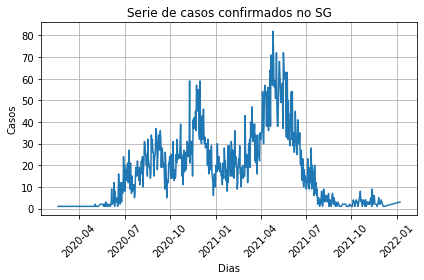

In [130]:
plt.plot(series.dataInicioSintomas,series.ones)
plt.xticks(rotation=45)

plt.xlabel("Dias")

plt.ylabel("Casos")

plt.title('Serie de casos confirmados no SG')

plt.grid()

plt.tight_layout()

In [131]:
series2 = series.groupby(['week'])['ones'].sum().reset_index()

In [132]:
series2

,week,ones
0,2020-07,1
1,2020-08,1
2,2020-11,1
3,2020-12,1
4,2020-14,2
...,...,...
89,2021-46,23
90,2021-47,16
91,2021-48,10
92,2021-49,2


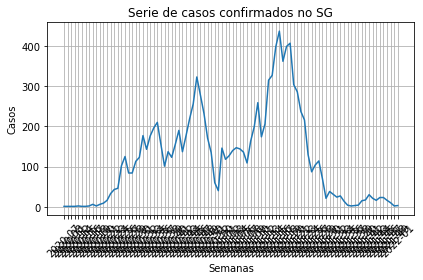

In [133]:
plt.plot(series2.week,series2.ones)

plt.xticks(rotation=45)

plt.xlabel("Semanas")

plt.ylabel("Casos")

plt.title('Serie de casos confirmados no SG')

plt.grid()

plt.tight_layout()

# Contagem das categorias por casos confirmados

In [134]:
df2.sexo.value_counts()

0    6127
1    5071
Name: sexo, dtype: int64

In [138]:
6127*100/11198

54.715127701375245

In [139]:
5071*100/11198

45.284872298624755

In [140]:
dta = df2['faixa'].value_counts().reset_index()

In [154]:
dta['perc'] = round(dta.faixa*100/11198,2)

In [155]:
dta

,index,faixa,perc
0,30-39,2618,23.38
1,18-29,2532,22.61
2,40-49,2191,19.57
3,50-64,1794,16.02
4,0-17,1263,11.28
5,65-74,472,4.22
6,75-84,245,2.19
7,85+,83,0.74


In [152]:
dta2 = df2.racaCor.value_counts().reset_index()

dta2['perc'] = round(dta2.racaCor*100/11372,2)

In [157]:
dta2

,index,racaCor,perc
0,Ignorado,6149,54.07
1,Parda,2767,24.33
2,Amarela,1436,12.63
3,Branca,700,6.16
4,Preta,137,1.20
5,99,9,0.08


In [169]:
dta3 = df2.condicoes.value_counts().reset_index()

In [170]:
dta3['perc'] = round(dta3.condicoes*100/11372,2)

dta3

,index,condicoes,perc
0,99,10757,94.59
1,Doenças cardíacas crônicas,173,1.52
2,Diabetes,89,0.78
3,Doenças respiratórias crônicas descompensadas,70,0.62
4,"Diabetes, Doenças cardíacas crônicas",24,0.21
5,"Doenças cardíacas crônicas, Diabetes",23,0.20
6,Gestante,15,0.13
7,Imunossupressão,11,0.10
8,Doenças renais crônicas em estágio avançado (g...,10,0.09
9,"Doenças respiratórias crônicas descompensadas,...",4,0.04


In [171]:
df2.condicoes.value_counts()

99                                                                                                                                                           10757
Doenças cardíacas crônicas                                                                                                                                     173
Diabetes                                                                                                                                                        89
Doenças respiratórias crônicas descompensadas                                                                                                                   70
Diabetes, Doenças cardíacas crônicas                                                                                                                            24
Doenças cardíacas crônicas, Diabetes                                                                                                                            23
Gestante              

In [ ]:
Diabetes                                                                   89
Diabetes, Doenças cardíacas crônicas                                       24
Doenças cardíacas crônicas, Diabetes 23
Doenças respiratórias crônicas descompensadas, Diabetes                     3
Doenças cardíacas crônicas, Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)     2
Diabetes, Doenças cardíacas crônicas, Imunossupressão 2
Diabetes, Doenças respiratórias crônicas descompensadas 2
Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5) 1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Diabetes 1
Doenças respiratórias crônicas descompensadas, Diabetes, Doenças cardíacas crônicas 1
Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Diabetes 1


In [172]:
89+24+23+3+2+2+2+1+1+1+1

149

In [ ]:
Outros                                                                                              1
Doenças cardíacas crônicas, Portador de doenças cromossômicas ou estado de fragilidade imunológica  1

In [ ]:
Obesidade                                                                                           2

In [ ]:
Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)    10
Doenças cardíacas crônicas, Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5) 2
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Imunossupressão  1
Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5) 1
Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5) 1
Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Doenças cardíacas crônicas 1
Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Diabetes  1

In [173]:
10+2+1+1+1+1+1

17

In [ ]:
Imunossupressão 11
Diabetes, Doenças cardíacas crônicas, Imunossupressão 2
Doenças cardíacas crônicas, Imunossupressão 1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Imunossupressão 1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Imunossupressão  1
Doenças cardíacas crônicas, Portador de doenças cromossômicas ou estado de fragilidade imunológica 1

In [174]:
11+2+4

17

In [ ]:
Doenças cardíacas crônicas   173
Diabetes, Doenças cardíacas crônicas  24
Doenças cardíacas crônicas, Diabetes  23
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas                                                                                        4
Doenças cardíacas crônicas, Diabetes, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)                                                              2
Diabetes, Doenças cardíacas crônicas, Imunossupressão                                                                                                            2
Doenças cardíacas crônicas, Imunossupressão                                                                                                                      1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Imunossupressão                                                                       1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Imunossupressão        1
Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5)                                                                        1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Diabetes                                                                              1
Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Doenças cardíacas crônicas                                                                        1
Doenças respiratórias crônicas descompensadas, Diabetes, Doenças cardíacas crônicas                                                                              1

In [175]:
173 + 24 + 23 + 4+4+7

235

In [ ]:
Doenças respiratórias crônicas descompensadas 70
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas 4
Doenças respiratórias crônicas descompensadas, Diabetes                                                                                                          3
Diabetes, Doenças respiratórias crônicas descompensadas                                                                                                          2
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Imunossupressão                                                                       1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Doenças renais crônicas em estágio avançado (graus 3, 4 ou 5), Imunossupressão        1
Doenças respiratórias crônicas descompensadas, Doenças cardíacas crônicas, Diabetes                                                                              1
Doenças respiratórias crônicas descompensadas, Diabetes, Doenças cardíacas crônicas                                                                              1

In [176]:
70+4+3+2+4

83

In [ ]:
Gestante  15

In [182]:
round(4*100/11372,2)

0.04

# Dados vacinação

In [214]:
faixaVac = pd.read_csv('/Users/julianeoliveira/Desktop/github/Datasets from the gitcomputations/Irece/faixaVac.csv',sep=';')

In [226]:
faixaVac

,ind_linkado_0-17,ind_linkado_18-29,ind_linkado_30-39,ind_linkado_40-49,ind_linkado_50-64,ind_linkado_65-74,ind_linkado_75-84,ind_linkado_85+,count,perc
0,0,0,0,1,0,0,0,0,11813,16.528151
1,0,0,0,0,1,0,0,0,11632,16.274905
2,0,0,0,0,0,0,0,1,65,0.090945
3,0,0,0,0,0,1,0,0,3882,5.431498
4,0,1,0,0,0,0,0,0,16325,22.841113
5,0,0,1,1,0,0,0,0,385,0.538672
6,0,0,0,1,1,0,0,0,357,0.499496
7,0,0,0,0,0,0,0,1,675,0.944426
8,0,0,0,0,0,0,1,0,1933,2.704556
9,0,1,0,0,0,0,0,0,155,0.216868


In [216]:
faixaVac['count'].sum()

71472

In [229]:
faixaVac['perc'] = round(faixaVac['count']*100/faixaVac['count'].sum(),2)

In [251]:
faixaVac[faixaVac['ind_linkado_85+'] == 1]['count'].sum()*100/faixaVac['count'].sum()

1.0353704947391986

In [241]:
(11813+385)*100/faixaVac['count'].sum()

17.066823371390196

In [221]:
(65+675)*100/faixaVac['count'].sum()

1.0353704947391986